<a href="https://colab.research.google.com/github/MrUmidjan90/My-signature-verification/blob/main/Bingali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Базы для обучения/data4.zip","r") as zip_ref:
    zip_ref.extractall("data")

In [3]:
import os, shutil
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [4]:
train_dir = os.getcwd()+'/data/data4/train/'
test_dir = os.getcwd()+'/data/data4/test/'
validate_dir = os.getcwd()+'/data/data4/validate/'

In [5]:
train_dir = os.getcwd()+'/data/data4/train/'
test_dir = os.getcwd()+'/data/data4/test/'
validate_dir = os.getcwd()+'/data/data4/validate/'
#Test DIR
DIR3=os.getcwd()+'/data/data4/test/forged/'
DIR4=os.getcwd()+'/data/data4/test/genuine/'

#Validate DIR
DIR5=os.getcwd()+'/data/data4/validate/validate_forged/'
DIR6=os.getcwd()+'/data/data4/validate/validate_genuine/'

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(250,150,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 74, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 72, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 17, 128)      0

In [7]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256,150),
        batch_size=200,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validate_dir,
        target_size=(256,150),
        batch_size=100,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,
      epochs=200
    ,
      validation_data=validation_generator,
      validation_steps=2)
model.save('model1.h5')

Found 880 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 160 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
2/2 [==============================] - 18s 3s/step - loss: 0.8001 - acc: 0.5100 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 2/200
2/2 [==============================] - 3s 1s/step - loss: 0.6959 - acc: 0.4893 - val_loss: 0.6952 - val_acc: 0.5000
Epoch 3/200
2/2 [==============================] - 2s 1s/step - loss: 0.6751 - acc: 0.5725 - val_loss: 0.6985 - val_acc: 0.5000
Epoch 4/200
2/2 [==============================] - 2s 1s/step - loss: 0.6749 - acc: 0.5650 - val_loss: 0.6914 - val_acc: 0.5000
Epoch 5/200
2/2 [==============================] - 2s 1s/step - loss: 0.6689 - acc: 0.5775 - val_loss: 0.6815 - val_acc: 0.5000
Epoch 6/200
2/2 [==============================] - 2s 2s/step - loss: 0.6638 - acc: 0.5857 - val_loss: 0.6828 - val_acc: 0.5000
Epoch 7/200
2/2 [==============================] - 2s 1s/step - loss: 0.6584 - acc: 0.5725 - val_loss: 0.6717 - val_acc: 0.5188
Epoch 8/200
2/2 [==============================] - 2s 1s/step - loss: 0.6546 - acc: 0.6375 - val_loss: 

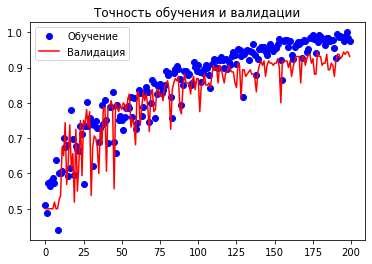

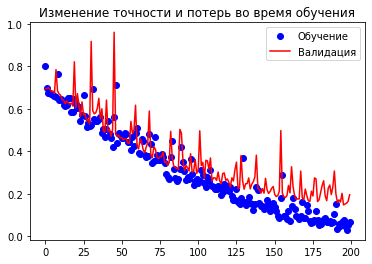

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Обучение')
plt.plot(epochs, val_acc, 'red', label='Валидация')
plt.title('Точность обучения и валидации')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Обучение')
plt.plot(epochs, val_loss, 'red', label='Валидация')
plt.title('Изменение точности и потерь во время обучения')
plt.legend()

plt.show()